## Problem statement

- In this section we going to predition the loan approved or not using df

- lets say there is ABC bank, few people need the loan. so they visit the bank for loan amount to improve businees or buy some items. bank employee will confirm whether loan amount should be approved or not based on the respective customer data.

- Your are machine learning engineer and build the model. with help of this model the bank employee will get the confirmation.

## Import the libraries

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the dataset

In [242]:
df = pd.read_csv('/content/drive/MyDrive/Cloud Lab/ML Projects/2. Loan Approval Prediction/loan.csv')

## Data Preprocessing

In [243]:
# lets the print the first five rows of the df
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [244]:
# changing the column names with proper format

df.rename({'ApplicantIncome':'Applicant_Income',
                'CoapplicantIncome':'Coapplicant_Income',
                'LoanAmount':'Loan_Amount',
                },axis=1, inplace = True)

In [245]:
# lets view the shape of the df

df.shape

(614, 13)

In [246]:
for i in range(len(df['Dependents'])):
  if df['Dependents'][i] == '3+':
    df['Dependents'][i] = '3'

<ipython-input-246-933449684c94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'][i] = '3'


In [247]:
# lets check whether we have null or missing data.

df.isna().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

Observation results:

- Below mentioned columns we have null values.
- Gender, Married, dependents, Self_Employeed, LoanAmount, Loan_Amount_Term, Credit_History

<Axes: >

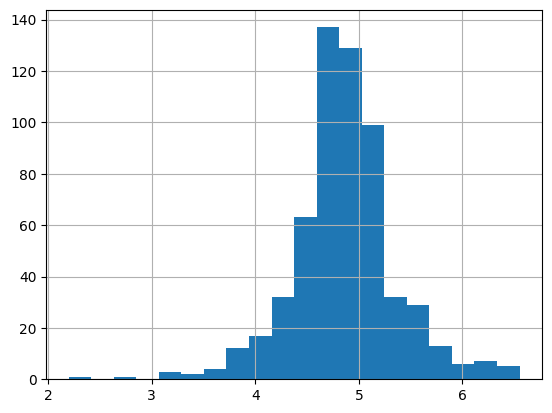

In [248]:
df['LoanAmount_Log'] = np.log(df['Loan_Amount'])
df['LoanAmount_Log'].hist(bins=20)

<Axes: >

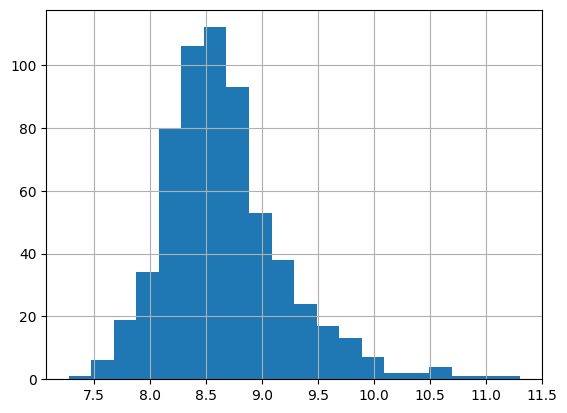

In [249]:
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']
df['Total_Income_Log'] = np.log(df['Total_Income'])
df['Total_Income_Log'].hist(bins=20)

In [250]:
# Gender, Married, dependents, Self_Employeed, Loan_Amount, Loan_Amount_Term, Credit_History

In [251]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Loan_Amount'].fillna(df['Loan_Amount'].mean(), inplace = True)
df['LoanAmount_Log'].fillna(df['LoanAmount_Log'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [252]:
# lets verify the null values in df

df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_Log        0
Total_Income          0
Total_Income_Log      0
dtype: int64

Observation results:

- we can see that there is no null or missing values. so proceed further

In [253]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,Total_Income,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [254]:
X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:,12].values

In [255]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [256]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

number of people who take loan as group by gender
Male      502
Female    112
Name: Gender, dtype: int64


<ipython-input-257-549b31cc08f4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'Gender', data = df, palette = 'Set1')


<Axes: xlabel='Gender', ylabel='count'>

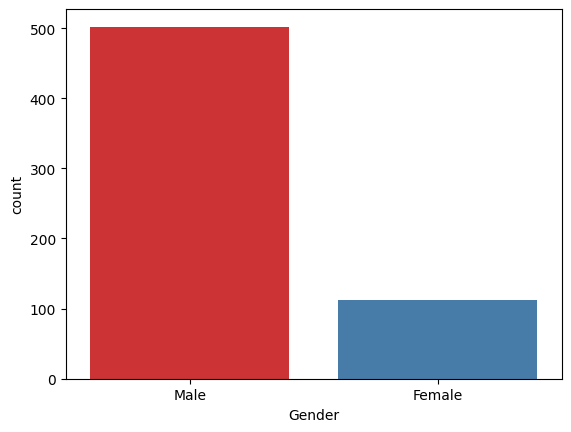

In [257]:
# people whoever taken loan based on gender

import seaborn as sns

print('number of people who take loan as group by gender')
print(df['Gender'].value_counts())
sns.countplot( x = 'Gender', data = df, palette = 'Set1')

plot the whoever taken a loan as group of marital status
Yes    401
No     213
Name: Married, dtype: int64


<ipython-input-258-a4a4c9f88f12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Married', data = df, palette = 'Set2')


<Axes: xlabel='Married', ylabel='count'>

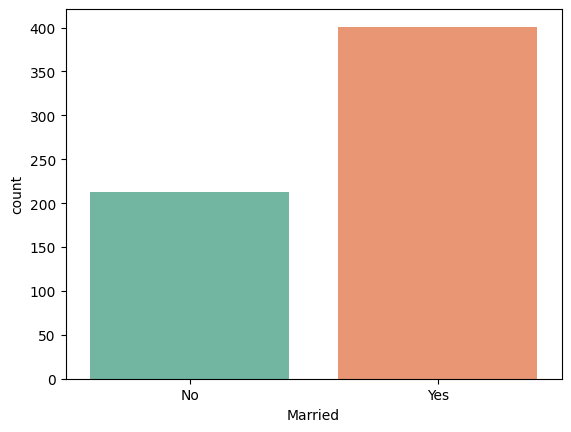

In [258]:
# plot the whoever taken loan as marital status

print('plot the whoever taken a loan as group of marital status')
print(df['Married'].value_counts())

sns.countplot(x = 'Married', data = df, palette = 'Set2')

plot the whover taken the loan based on dependents
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


<ipython-input-259-b87d3a987053>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Dependents', data = df, palette = 'Set3')


<Axes: xlabel='Dependents', ylabel='count'>

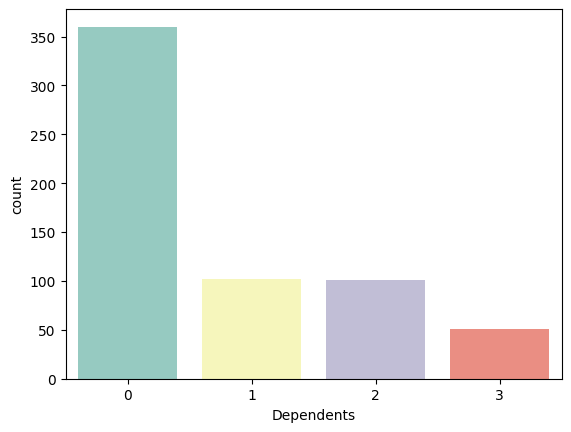

In [259]:
# plot the whoever taken the loan based on dependents

print('plot the whover taken the loan based on dependents')
print(df['Dependents'].value_counts())

sns.countplot(x = 'Dependents', data = df, palette = 'Set3')

plot the whoever taken loan based on self employeed
No     532
Yes     82
Name: Self_Employed, dtype: int64


<ipython-input-260-beb2f26cbb13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Self_Employed', data = df, palette = 'Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

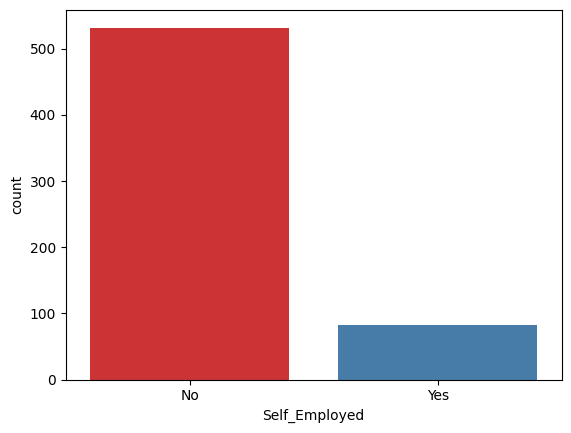

In [260]:
# plot the whoever taken loan based on self employeed

print('plot the whoever taken loan based on self employeed')
print(df['Self_Employed'].value_counts())


sns.countplot(x = 'Self_Employed', data = df, palette = 'Set1')

plot the whoever the taken loan based on loan amount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: Loan_Amount, Length: 204, dtype: int64


<ipython-input-261-f23775809b10>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Loan_Amount', data = df, palette = 'Set2')


<Axes: xlabel='Loan_Amount', ylabel='count'>

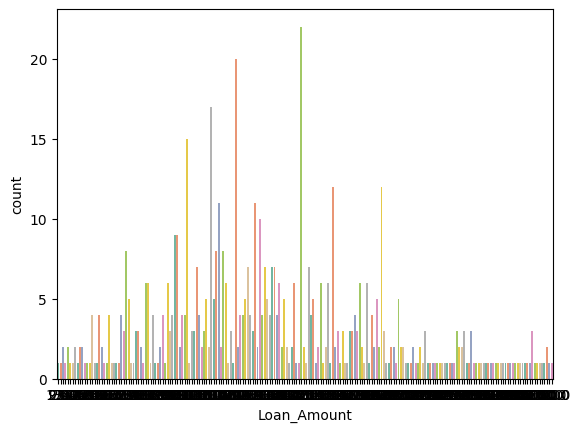

In [261]:
# plot the who ever the taken loan based on loan amount

print('plot the whoever the taken loan based on loan amount')
print(df['Loan_Amount'].value_counts())

sns.countplot(x = 'Loan_Amount', data = df, palette = 'Set2')

plot the whoever the taken loan based on credit history
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<ipython-input-262-eab095c0f602>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Credit_History', data = df, palette = 'Set3')


<Axes: xlabel='Credit_History', ylabel='count'>

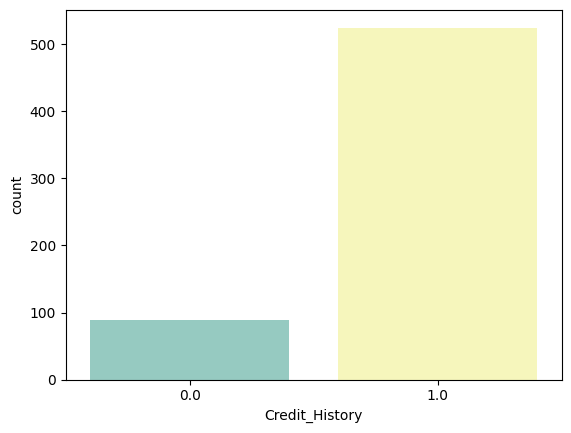

In [262]:
# plot the whoever the taken loan based in credit history

print('plot the whoever the taken loan based on credit history')
print(df['Credit_History'].value_counts())

sns.countplot(x = 'Credit_History', data = df, palette = 'Set3')

### Encoding the categorical data

 #### i. Encoding independent variable

In [263]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,1,3])], remainder = 'passthrough')
X = ct.fit_transform(X)

#### ii. Encoding dependent variable

In [264]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

### Splitting dataset into train set and test set

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [266]:
type(X_train)

numpy.ndarray

In [267]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train the model with random forest classifier

In [268]:
from sklearn.ensemble import RandomForestClassifier

# creating instance for the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# train the model
rf_classifier.fit(X_train, y_train)

# predicting the accuracy
y_pred = rf_classifier.predict(X_test)

In [269]:
from sklearn.metrics import accuracy_score

# find out the accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy : ',accuracy*100)

Accuracy :  76.42276422764228


## Train the model with Naive bayes

In [270]:
from sklearn.naive_bayes import GaussianNB

# craeting the instance for the GaussianNB
nb = GaussianNB()

# train the model
nb.fit(X_train, y_train)

# predicting the accuracy
y_pred = nb.predict(X_test)

In [271]:
# to find out the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f" Accuracy Score : {accuracy * 100}")

 Accuracy Score : 78.04878048780488


## Train the model with DecisionTree Classifier

In [274]:
from sklearn.tree import DecisionTreeClassifier

# creating instance for the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# train the model
dt_classifier.fit(X_train, y_train)

# predicting the accuracy
y_pred = dt_classifier.predict(X_test)

In [275]:
# find out the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy score : ",accuracy * 100)

Accuracy score :  70.73170731707317


## Train the model with KNearest Neighbors

In [277]:
from sklearn.neighbors import KNeighborsClassifier

# creating instance for KNeighborsClassifier
kn_classifier = KNeighborsClassifier()

# train the model
kn_classifier.fit(X_train, y_train)

# predicting the accuracy
y_pred = kn_classifier.predict(X_test)

In [278]:
# to find out the accuracy

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy score : ",accuracy * 100)

Accuracy score :  75.60975609756098


## Conclusion

- So far we train the 4 algorithms. we can see that Naive bayes performs better than other models.

- Prediction accuracy is 75 % .